## Interpolation Test Stimuli Performance V3

Two objectives:
- Training Data
- Model comparison
    - collapsed, and by individual

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from behav import plotting, utils, loading
from starling_rhythm.utils.analysis import stim_parser, plot_subject_acquisition, acquisition_data_preprocessing

from starling_rhythm.utils.paths import PROCESSED_DIR, FIGURE_DIR
import pandas as pd

import seaborn as sns
sns.set_style("ticks")

data_path = '/mnt/cube/RawData/Magpi/'

subjects = (
    ['B1520', 'B1535']
)

/home/AD/j8xing/starling_rhythm_mfdfa/starling_rhythm/utils/analysis.py:1: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [2]:
%%time
behav_data = loading.load_data_pandas(subjects, data_path)

CPU times: user 1.51 s, sys: 90.7 ms, total: 1.6 s
Wall time: 9.4 s


## Clean debug trials and parse stim info

In [3]:
behav_data['B1520'] = behav_data['B1520'][behav_data['B1520'].index > '2023-01-19 00:00:00.000000'] 
## B1520 started trials on the 19th, previous are debug trials

behav_data['B1535'] = behav_data['B1535'][behav_data['B1535'].index > '2023-01-20 00:00:00.000000'] 
## B1535 started trials on the 20th, previous are debug trials

In [4]:
behav_data = stim_parser(behav_data)

Output stim labels for B1520: 123990it [00:12, 10170.66it/s]
Output stim labels for B1535: 116252it [00:11, 10184.28it/s]


In [87]:
behav_data['B1535']

,session,index,type_,stimulus,class_,response,correct,rt,reward,punish,data_file,stim_type,pair_indices,inter_nums
time,,,,,,,,,,,,,,
2023-01-20 10:57:54.320723,1,0,normal,/home/bird/opdat/B1535/stimuli/shuffleGap_0_ma...,L,none,NaN,NaN,False,False,/mnt/cube/RawData/Magpi/B1535/B1535_trialdata_...,training,0,max
2023-01-20 11:12:57.728064,1,1,normal,/home/bird/opdat/B1535/stimuli/shuffleGap_0_ma...,L,none,NaN,NaN,False,False,/mnt/cube/RawData/Magpi/B1535/B1535_trialdata_...,training,0,max
2023-01-20 11:17:19.517870,1,2,normal,/home/bird/opdat/B1535/stimuli/shuffleGap_0_mi...,R,none,NaN,NaN,False,False,/mnt/cube/RawData/Magpi/B1535/B1535_trialdata_...,training,0,min
2023-01-20 11:20:29.424915,1,3,normal,/home/bird/opdat/B1535/stimuli/shuffleGap_0_mi...,R,none,NaN,NaN,False,False,/mnt/cube/RawData/Magpi/B1535/B1535_trialdata_...,training,0,min
2023-01-20 11:22:28.860270,1,4,normal,/home/bird/opdat/B1535/stimuli/shuffleGap_0_ma...,L,none,NaN,NaN,False,False,/mnt/cube/RawData/Magpi/B1535/B1535_trialdata_...,training,0,max
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-24 09:40:05.201206,99,27,normal,/home/bird/opdat/B1535/stimuli/shuffleGap_0_mi...,R,right,True,0.657193,True,False,/mnt/cube/RawData/Magpi/B1535/B1535_trialdata_...,training,0,min
2023-05-24 09:41:58.361142,99,28,test,/home/bird/opdat/B1535/salv_interpolate/shuffl...,L,right,False,0.297012,False,False,/mnt/cube/RawData/Magpi/B1535/B1535_trialdata_...,INTER,0,56
2023-05-24 09:42:50.795379,99,29,normal,/home/bird/opdat/B1535/stimuli/shuffleGap_0_mi...,R,right,True,0.266474,True,False,/mnt/cube/RawData/Magpi/B1535/B1535_trialdata_...,training,0,min


In [89]:
behav_data['B1520'].groupby(by = 'type_')['type_'].agg('count')

type_
correction    62784
normal        54676
test           6530
Name: type_, dtype: int64

### For every test trial, only keep if the previous 100 trial accuracy is > 0.8

In [7]:
from starling_rhythm.utils.analysis import test_filter

In [8]:
test_data, training_data = test_filter(behav_data, accuracy_threshold = 0.8, past_baseline_trials = 100)

Iterating through test trials for subject B1520: 6530it [00:55, 116.94it/s]
Iterating through test trials for subject B1535: 6371it [01:03, 100.98it/s]


## Plot acquisition data

Plot accuracy (y) over time (x) for each stimuli

/home/AD/j8xing/starling_rhythm_mfdfa/starling_rhythm/utils/analysis.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[subj]['day'] = [
/home/AD/j8xing/starling_rhythm_mfdfa/starling_rhythm/utils/analysis.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[subj]['day'] = [


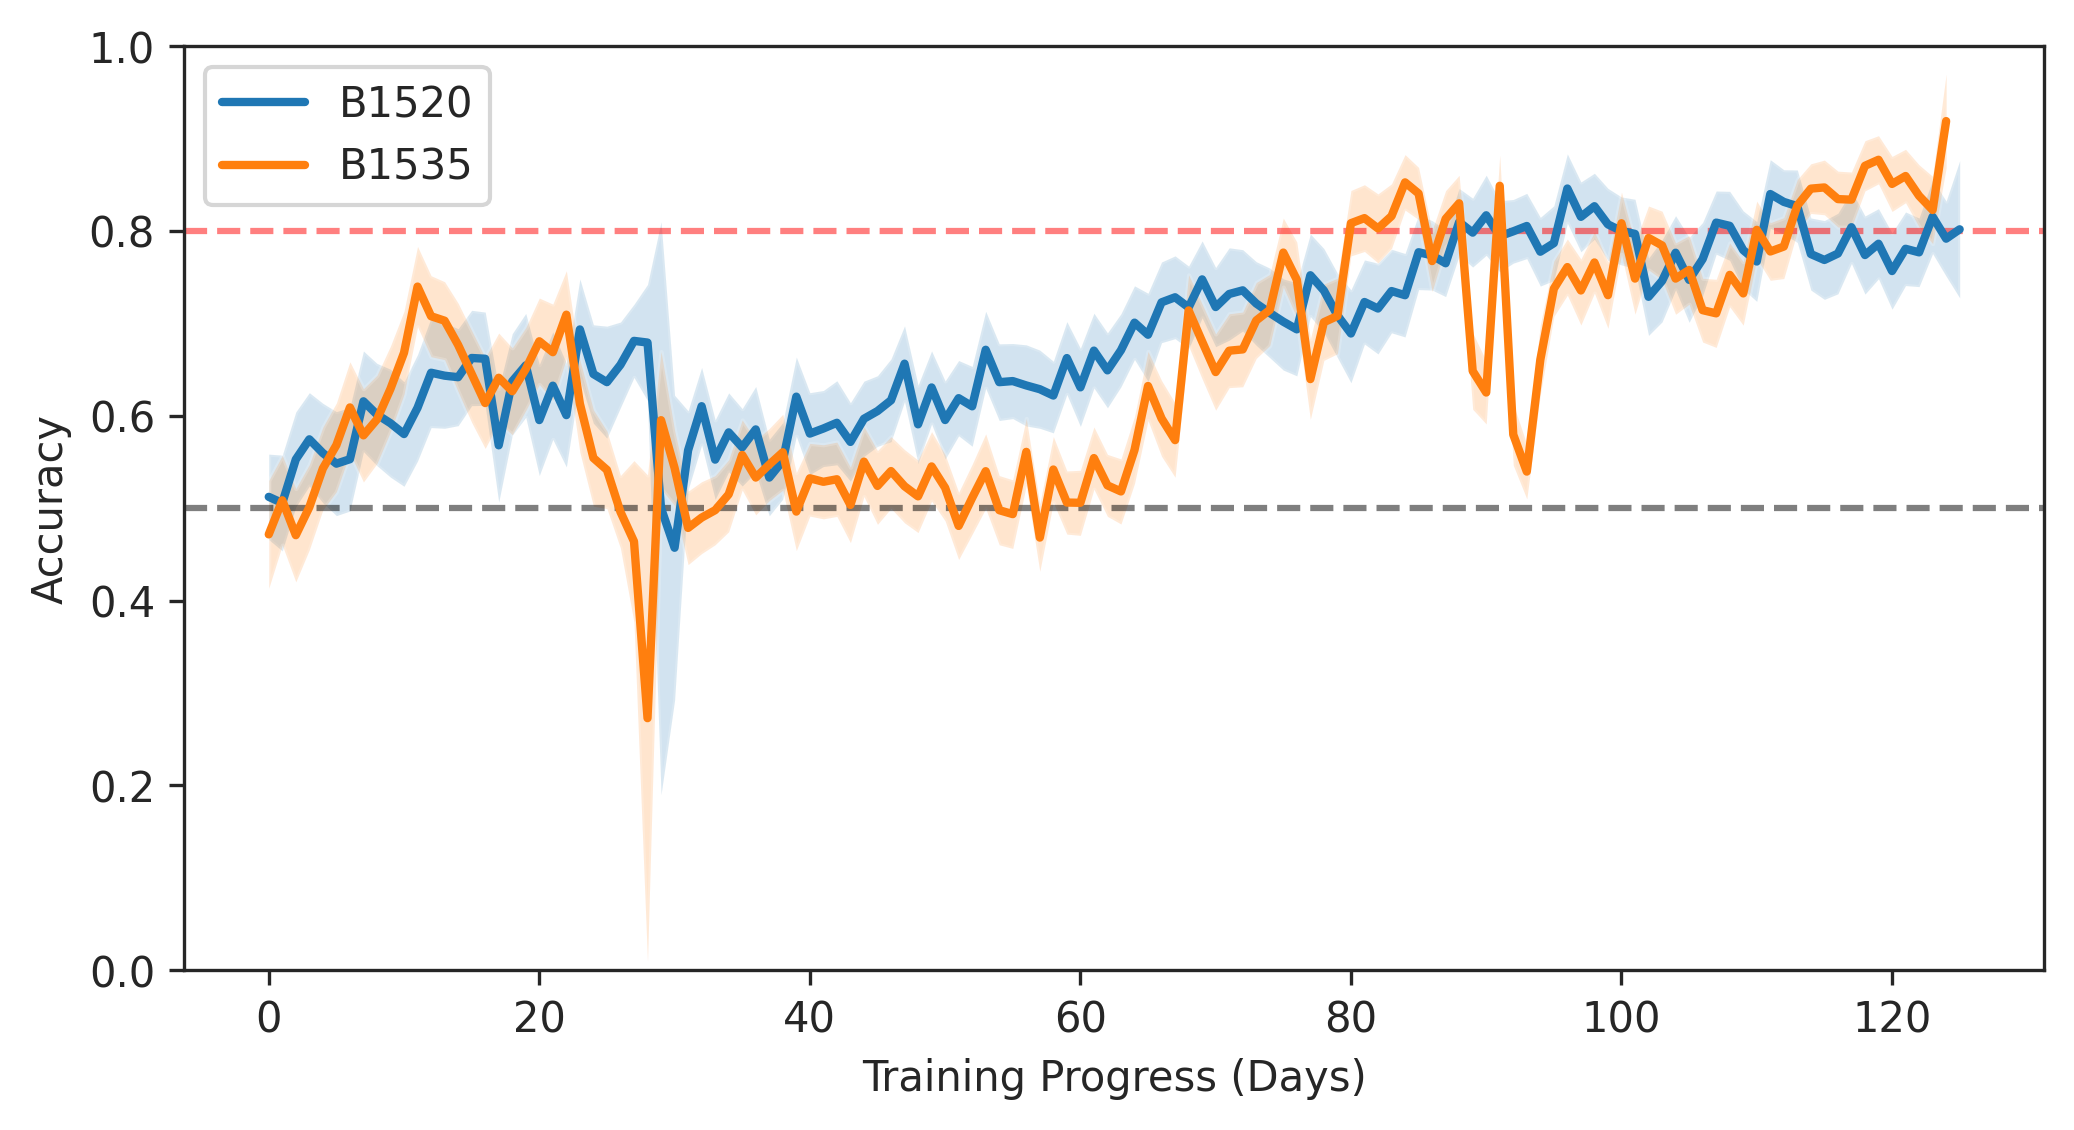

In [9]:
plot_subject_acquisition(behav_data)

plt.savefig(FIGURE_DIR / 'F4_A_acquisition.pdf', dpi = 'figure', format = 'pdf', transparent = True)

## Plot pre-test data by bird and stimuli

In [10]:
from statsmodels.stats.proportion import proportion_confint

In [11]:
test_data

{'B1520':                              time session index type_  \
 86150  2023-04-19 12:30:29.868374       1   102  test   
 86221  2023-04-19 13:35:31.927146       1    29  test   
 86243  2023-04-19 13:50:33.334587       1    51  test   
 86244  2023-04-19 13:50:49.443718       1    52  test   
 86247  2023-04-19 13:51:52.317272       1    55  test   
 ...                           ...     ...   ...   ...   
 123895 2023-05-24 08:55:06.318009      72    35  test   
 123901 2023-05-24 08:57:24.125263      72    41  test   
 123902 2023-05-24 08:57:44.702826      72    42  test   
 123911 2023-05-24 09:03:33.587608      72    51  test   
 123945 2023-05-24 09:22:50.757292      72    85  test   
 
                                                  stimulus class_ response  \
 86150   /home/bird/opdat/B1520/salv_interpolate/shuffl...      R     left   
 86221   /home/bird/opdat/B1520/salv_interpolate/shuffl...      R     left   
 86243   /home/bird/opdat/B1520/salv_interpolate/shuffl... 

In [12]:
trainB1520 = behav_data['B1520'].reset_index()
trainB1535 = behav_data['B1535'].reset_index()

trainB1520['bID'] = 'B1520'
trainB1535['bID'] = 'B1535'

trainB1520 = trainB1520[trainB1520.type_ == 'normal']
trainB1535 = trainB1535[trainB1535.type_ == 'normal']

trainB1520 = trainB1520[trainB1520.time < test_data['B1520'].time.values[0]]
trainB1535 = trainB1535[trainB1535.time < test_data['B1535'].time.values[0]]

trainB1520 = trainB1520.iloc[-1000:]
trainB1535 = trainB1535.iloc[-1000:]

pretest = pd.concat([trainB1520, trainB1535])

In [13]:
groupby_list = ['bID', 'pair_indices', 'inter_nums']

In [14]:
pretest_data = pd.DataFrame(
    pretest.groupby(
        groupby_list
    )['correct'].agg(['mean', 'count'])
)

In [15]:
test_data['B1520']

,time,session,index,type_,stimulus,class_,response,correct,rt,reward,punish,data_file,stim_type,pair_indices,inter_nums
86150,2023-04-19 12:30:29.868374,1,102,test,/home/bird/opdat/B1520/salv_interpolate/shuffl...,R,left,False,0.047982,False,False,/mnt/cube/RawData/Magpi/B1520/B1520_trialdata_...,INTER,0,96
86221,2023-04-19 13:35:31.927146,1,29,test,/home/bird/opdat/B1520/salv_interpolate/shuffl...,R,left,False,0.204056,False,False,/mnt/cube/RawData/Magpi/B1520/B1520_trialdata_...,INTER,0,72
86243,2023-04-19 13:50:33.334587,1,51,test,/home/bird/opdat/B1520/salv_interpolate/shuffl...,R,right,True,0.375426,False,False,/mnt/cube/RawData/Magpi/B1520/B1520_trialdata_...,INTER,0,100
86244,2023-04-19 13:50:49.443718,1,52,test,/home/bird/opdat/B1520/salv_interpolate/shuffl...,L,left,True,0.360404,False,False,/mnt/cube/RawData/Magpi/B1520/B1520_trialdata_...,INTER,0,32
86247,2023-04-19 13:51:52.317272,1,55,test,/home/bird/opdat/B1520/salv_interpolate/shuffl...,L,left,True,0.547329,False,False,/mnt/cube/RawData/Magpi/B1520/B1520_trialdata_...,INTER,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123895,2023-05-24 08:55:06.318009,72,35,test,/home/bird/opdat/B1520/salv_interpolate/shuffl...,L,left,True,0.172792,False,False,/mnt/cube/RawData/Magpi/B1520/B1520_trialdata_...,INTER,0,8
123901,2023-05-24 08:57:24.125263,72,41,test,/home/bird/opdat/B1520/salv_interpolate/shuffl...,R,none,NaN,NaN,False,False,/mnt/cube/RawData/Magpi/B1520/B1520_trialdata_...,INTER,0,96
123902,2023-05-24 08:57:44.702826,72,42,test,/home/bird/opdat/B1520/salv_interpolate/shuffl...,R,right,True,4.248528,False,False,/mnt/cube/RawData/Magpi/B1520/B1520_trialdata_...,INTER,0,96
123911,2023-05-24 09:03:33.587608,72,51,test,/home/bird/opdat/B1520/salv_interpolate/shuffl...,R,left,False,3.217644,False,False,/mnt/cube/RawData/Magpi/B1520/B1520_trialdata_...,INTER,0,80


In [16]:
pretest_data

mean  count
bID   pair_indices inter_nums                 
B1520 0            max         0.916667    240
                   min         0.737069    232
      1            max         0.823529    238
                   min         0.740157    254
B1535 0            max         0.669421    242
                   min         0.842105    247
      1            max         0.585062    241
                   min         0.741036    251

In [17]:
## calculate binomial CI
binomial_lower = []
binomial_upper = []

for i, row in pretest_data.iterrows():
    
    try:
        lower, upper = proportion_confint(int(row['mean'] * row['count']), row['count'], alpha = 0.05)
    except:
        lower = np.nan
        upper = np.nan
    
    binomial_lower.append(lower)
    binomial_upper.append(upper)
    
pretest_data['lower'] = binomial_lower
pretest_data['upper'] = binomial_upper

In [18]:
pretest_data = pretest_data.reset_index()

In [19]:
pretest_data['dummy_names'] = pretest_data['pair_indices'] + pretest_data['inter_nums']

In [20]:
pretest_data

,bID,pair_indices,inter_nums,mean,count,lower,upper,dummy_names
0,B1520,0,max,0.916667,240,0.881700,0.951634,0max
1,B1520,0,min,0.737069,232,0.680422,0.793716,0min
2,B1520,1,max,0.823529,238,0.775097,0.871962,1max
3,B1520,1,min,0.740157,254,0.686225,0.794090,1min
4,B1535,0,max,0.669421,242,0.610152,0.728690,0max
5,B1535,0,min,0.842105,247,0.796631,0.887580,0min
6,B1535,1,max,0.585062,241,0.522856,0.647268,1max
7,B1535,1,min,0.741036,251,0.686842,0.795230,1min


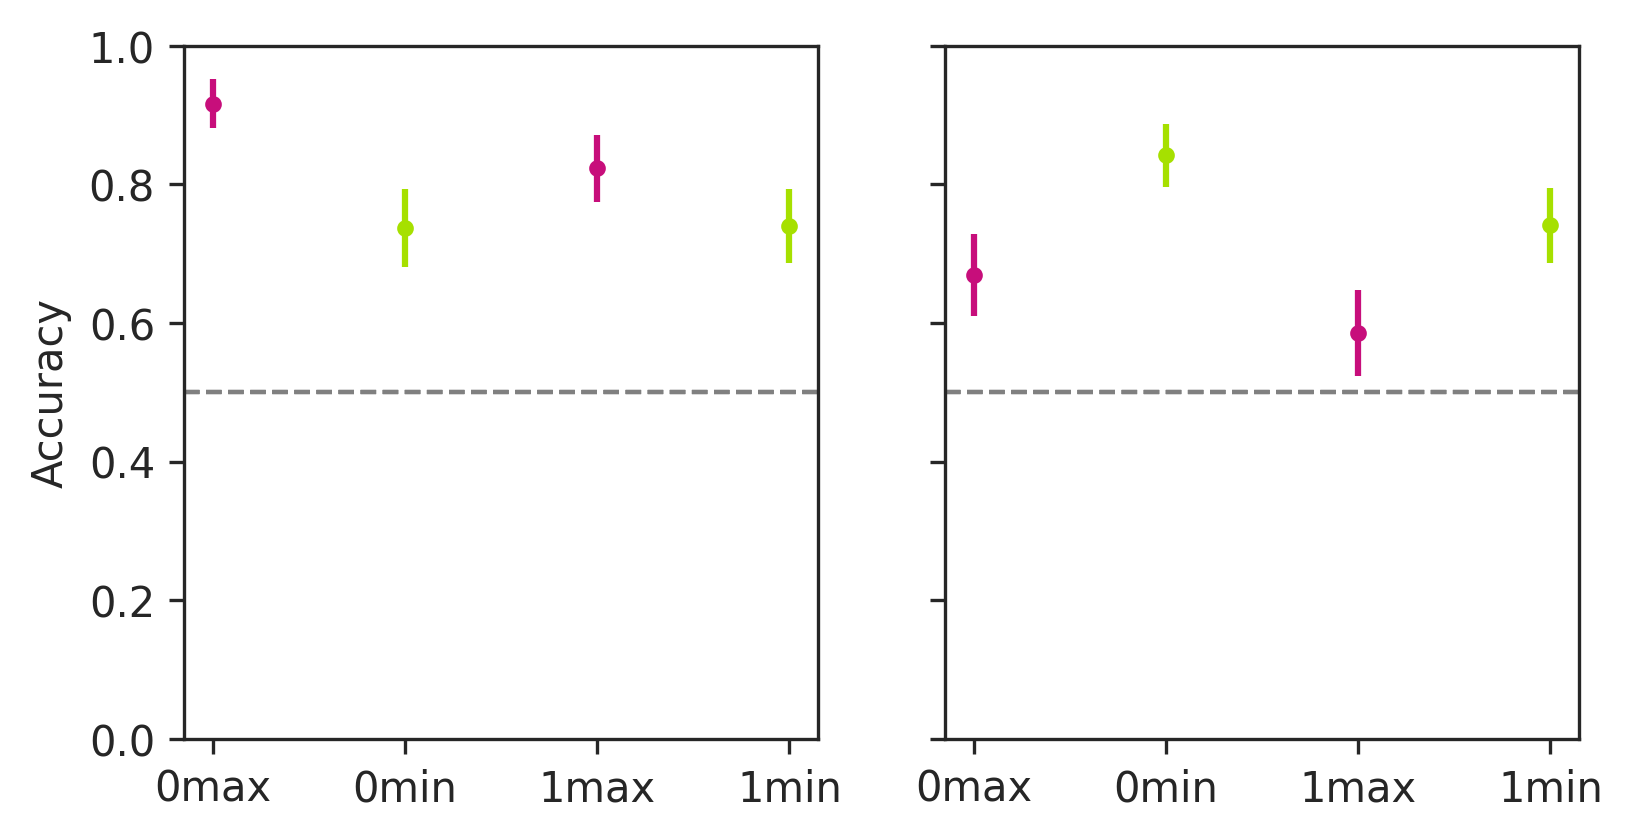

In [21]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (6, 3), dpi = 300, sharey = True)

colors = ["#C70E7B","#A6E000","#C70E7B","#A6E000", "#C70E7B","#A6E000","#C70E7B","#A6E000"]
sns.set_palette(sns.color_palette(colors))

for i, bID in zip(np.arange(0, len(np.unique(pretest_data['bID']))), np.unique(pretest_data['bID'])):
    select = pretest_data[pretest_data.bID == bID]
    for j, row in select.iterrows():
        axes[i].errorbar(x = row.dummy_names, y = row['mean'], yerr = [[row['mean'] - row.lower], [row.upper - row['mean']]], fmt = 'none', color = colors[j])
        axes[i].plot(row.dummy_names, row['mean'], marker = '.', color = colors[j])
        axes[i].axhline(y = 0.5, linewidth = 1, ls = '--', color = 'gray')

axes[0].set_ylim([0, 1])
axes[0].set_ylabel('Accuracy')

plt.savefig(FIGURE_DIR / 'F4_B_pretest.pdf', dpi = 'figure', format = 'pdf', transparent = True)

## Main test 

### Obtain psychometric function

In [22]:
test_data = pd.concat(test_data)

In [23]:
PMFX = pd.DataFrame(test_data.groupby(
    'inter_nums'
)['response'].agg('value_counts', normalize = True))
PMFX = PMFX.rename(columns = {'response': 'prop'})

In [24]:
PMFX = PMFX.reset_index()

In [25]:
PMFX

,inter_nums,response,prop
0,0,left,0.804598
1,0,right,0.172414
2,0,none,0.022989
3,4,left,0.770833
4,4,right,0.125000
...,...,...,...
94,124,left,0.169312
95,124,none,0.052910
96,127,right,0.727273
97,127,left,0.254545


## Only conduct test on left

In [26]:
PMFX_L = PMFX[PMFX.response == 'left']

In [27]:
PMFX_L['rank'] = PMFX_L['inter_nums'].rank(ascending = False)
PMFX_L = PMFX_L.sort_values(by = 'rank')
PMFX_L['inter_degree'] = np.linspace(0, 1, 33)

/tmp/ipykernel_41386/1359255609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PMFX_L['rank'] = PMFX_L['inter_nums'].rank(ascending = False)


## Graph psychometric function

<AxesSubplot:xlabel='inter_degree', ylabel='prop'>

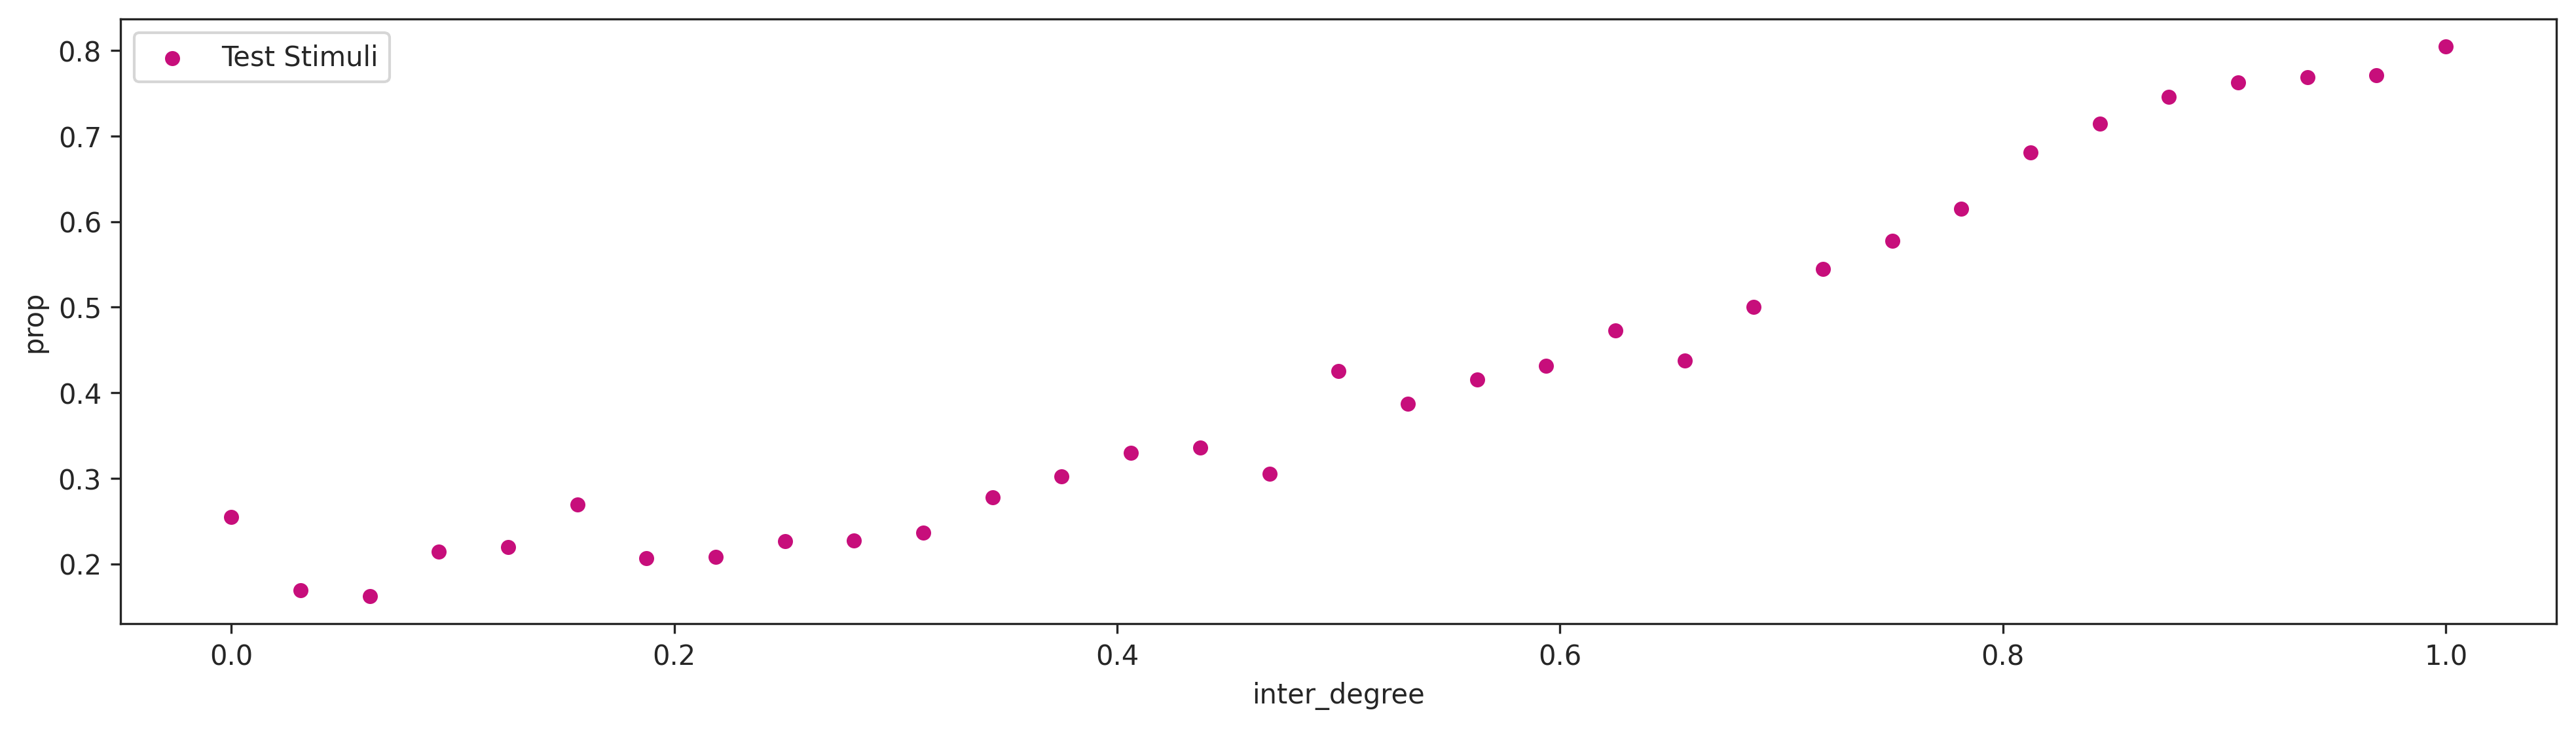

In [28]:
plt.figure(figsize = (16, 4), dpi = 300)
sns.scatterplot(
    data = PMFX_L,
    x = 'inter_degree',
    y = 'prop',
    label = 'Test Stimuli'
)

## Graph hypotheses on top

### get training baseline

In [29]:
bID = "s_b1555_22"
SAVE_PATH = PROCESSED_DIR / bID / 'salvage_inter_tmf.pickle'
stims = pd.read_pickle(SAVE_PATH)

In [30]:
grouped_training_data = pd.concat(training_data)

In [31]:
baseline_accuracies = pd.DataFrame(
    grouped_training_data.groupby(
        ['inter_nums']
    )['response'].agg('value_counts', normalize = True)
)

baseline_accuracies = baseline_accuracies.rename(columns = {'response': 'prop'})

In [32]:
baseline_accuracies

prop
inter_nums response          
max        left      0.833892
           right     0.124087
           none      0.042021
min        right     0.751302
           left      0.199306
           none      0.049392

### Hypothesis 1: Linear

In [33]:
left_baseline = baseline_accuracies.loc[('max', 'left')].values[0]
right_baseline = baseline_accuracies.loc[('max', 'right')].values[0]

In [34]:
### From left baseline to right baseline, there is a linear relationship in the linear interpolation space
hypo1_linear = (
    np.linspace(1, 0, 33), 
    np.linspace(left_baseline, right_baseline, 33)
)

### Hypothesis 2: MF

In [35]:
mf_function = list(stims.groupby('interpolation_num')['mean_tMF'].agg('mean')[::4].values)
mf_function.append(stims.groupby('interpolation_num')['mean_tMF'].agg('mean').iloc[-1])
len(mf_function)

33

In [36]:
def normalize(x, normalize_anchors, newRange=(0, 1)): #x is an array. Default range is between zero and one
    xmin, xmax = normalize_anchors #get max and min from input array
    norm = (x - xmin)/(xmax - xmin) # scale between zero and one
    
    if newRange == (0, 1):
        return(norm) # wanted range is the same as norm
    elif newRange != (0, 1):
        return norm * (newRange[1] - newRange[0]) + newRange[0] #scale to a different range.    
    #add other conditions here. For example, an error message

In [37]:
hypo2_linear = (
    np.linspace(1, 0, 33),
    normalize(
        x = mf_function, 
        normalize_anchors = (mf_function[0], mf_function[-1]), 
        newRange = (left_baseline, right_baseline)
    )
)

In [38]:
hypo1_linear

(array([1.     , 0.96875, 0.9375 , 0.90625, 0.875  , 0.84375, 0.8125 ,
        0.78125, 0.75   , 0.71875, 0.6875 , 0.65625, 0.625  , 0.59375,
        0.5625 , 0.53125, 0.5    , 0.46875, 0.4375 , 0.40625, 0.375  ,
        0.34375, 0.3125 , 0.28125, 0.25   , 0.21875, 0.1875 , 0.15625,
        0.125  , 0.09375, 0.0625 , 0.03125, 0.     ]),
 array([0.8338919 , 0.81171049, 0.78952909, 0.76734768, 0.74516628,
        0.72298488, 0.70080347, 0.67862207, 0.65644066, 0.63425926,
        0.61207786, 0.58989645, 0.56771505, 0.54553364, 0.52335224,
        0.50117083, 0.47898943, 0.45680803, 0.43462662, 0.41244522,
        0.39026381, 0.36808241, 0.34590101, 0.3237196 , 0.3015382 ,
        0.27935679, 0.25717539, 0.23499398, 0.21281258, 0.19063118,
        0.16844977, 0.14626837, 0.12408696]))

In [39]:
hypo2_linear

(array([1.     , 0.96875, 0.9375 , 0.90625, 0.875  , 0.84375, 0.8125 ,
        0.78125, 0.75   , 0.71875, 0.6875 , 0.65625, 0.625  , 0.59375,
        0.5625 , 0.53125, 0.5    , 0.46875, 0.4375 , 0.40625, 0.375  ,
        0.34375, 0.3125 , 0.28125, 0.25   , 0.21875, 0.1875 , 0.15625,
        0.125  , 0.09375, 0.0625 , 0.03125, 0.     ]),
 array([0.8338919 , 0.80127719, 0.79502822, 0.75956164, 0.72487852,
        0.68803746, 0.66641677, 0.67831073, 0.75461048, 0.77676853,
        0.75574946, 0.79519775, 0.83851915, 0.78569527, 0.75788483,
        0.70561483, 0.67988729, 0.61330933, 0.62373507, 0.60508054,
        0.48521526, 0.49377291, 0.46395184, 0.42542935, 0.37134344,
        0.33305539, 0.3053165 , 0.29709336, 0.22015585, 0.19946487,
        0.16811391, 0.18422727, 0.12408696]))

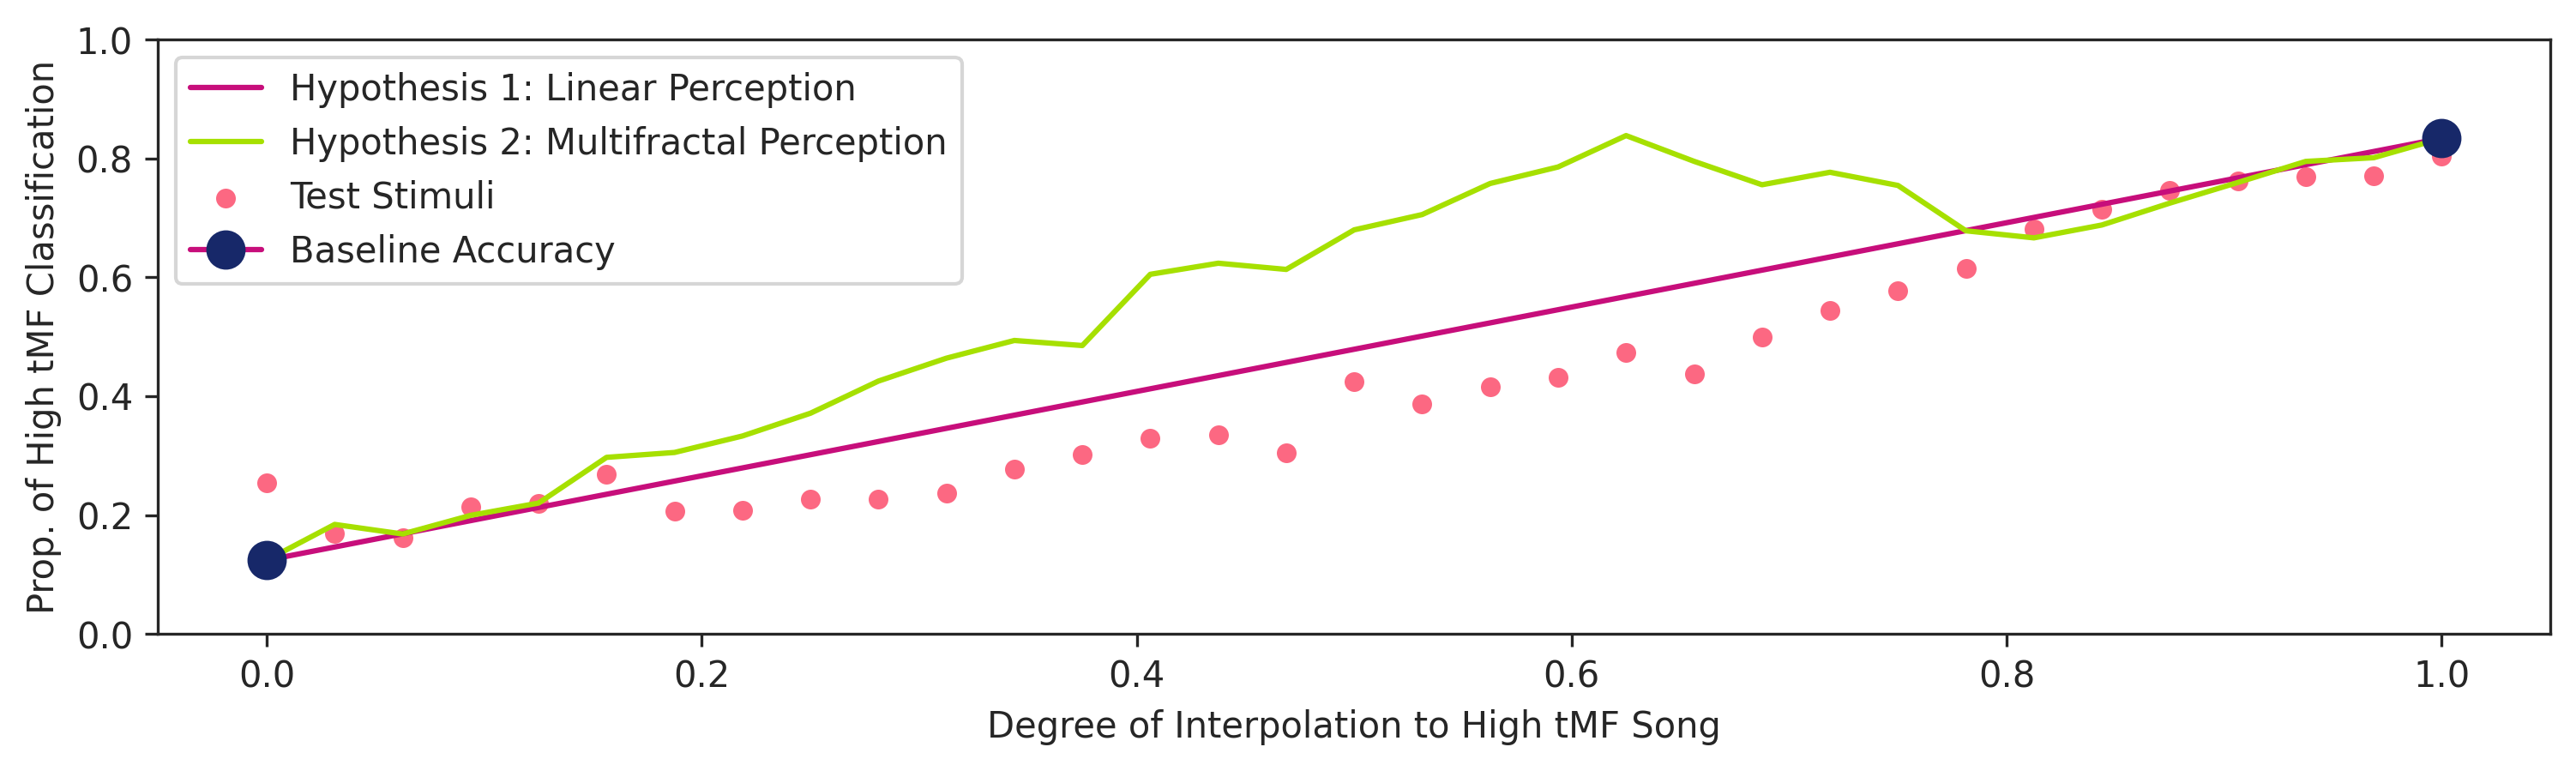

In [90]:
plt.figure(figsize = (12, 3), dpi = 300)

plt.plot(
    hypo1_linear[0],
    hypo1_linear[1],
    label = 'Hypothesis 1: Linear Perception'
)

plt.plot(
    hypo2_linear[0],
    hypo2_linear[1],
    label = 'Hypothesis 2: Multifractal Perception'
)

sns.scatterplot(
    data = PMFX_L,
    x = 'inter_degree',
    y = 'prop',
    label = 'Test Stimuli',
    color = '#FC6882'
)

plt.plot(1, left_baseline, marker = 'o', markerfacecolor = '#172869', markeredgecolor = '#172869', markersize = 10, label = 'Baseline Accuracy')
plt.plot(0, right_baseline, marker = 'o', markerfacecolor = '#172869', markeredgecolor = '#172869', markersize = 10)

plt.ylim(0, 1)
plt.ylabel('Prop. of High tMF Classification')
plt.xlabel('Degree of Interpolation to High tMF Song')

plt.legend()

plt.savefig(FIGURE_DIR / 'F5_A_Combined.pdf', dpi = 'figure', format = 'pdf', transparent = True)

### Add linear and multifractal prediction to PMFX

In [91]:
PMFX_L['linear_pred'] = np.flip(hypo1_linear[1])
PMFX_L['mf_pred'] = np.flip(hypo2_linear[1])

## calculate R^2

In [92]:
from sklearn.metrics import r2_score

In [93]:
r2_score(PMFX_L['prop'][1:-1], PMFX_L['linear_pred'][1:-1])

0.8352372344789221

In [94]:
r2_score(PMFX_L['prop'][1:-1], PMFX_L['mf_pred'][1:-1])

-0.07772475325254513

## CHI square

In [95]:
import scipy.stats

In [96]:
CHI_count = pd.DataFrame(test_data.groupby(
    ['inter_nums']
)['response'].agg(
    total = 'count'
)).reset_index()

In [97]:
CHI_count.head()

,inter_nums,total
0,0,174
1,4,192
2,8,173
3,12,181
4,16,185


In [98]:
CHI_count = CHI_count.sort_values(by = 'inter_nums', ascending = False)

In [99]:
linear_exp = (PMFX_L['linear_pred'].values * CHI_count['total']).values[1:-1]
linear_exp = linear_exp * (sum((PMFX_L['prop'].values[1:-1] * CHI_count['total'][1:-1]).astype(int))/ sum(linear_exp))
linear_exp

array([ 24.07240342,  26.25612866,  28.71754192,  33.72686067,
        40.31161562,  40.08571816,  46.70546472,  47.52565832,
        52.1492369 ,  56.02372753,  61.21891992,  65.2479311 ,
        62.13261155,  57.52639314,  70.4067382 ,  83.41865021,
        78.98990596,  88.86606092,  86.93203791,  82.55703912,
        94.00135321, 102.33286386, 105.4890584 , 100.03241574,
       118.18577468,  99.46976263, 118.98665321, 120.04170495,
       120.94223615, 118.93822991, 135.70930335])

In [100]:
mf_exp = (PMFX_L['mf_pred'].values * CHI_count['total']).values[1:-1]
mf_exp = mf_exp * (sum((PMFX_L['prop'].values[1:-1] * CHI_count['total'][1:-1]).astype(int))/ sum(mf_exp))
mf_exp

array([ 25.3747138 ,  21.9301751 ,  25.14768051,  29.20028132,
        42.65250974,  39.82802079,  46.60184597,  48.98236546,
        57.35675875,  62.88850457,  68.72995345,  67.89239107,
        76.28597613,  69.09222452,  79.11125279,  99.09513577,
        93.0747107 , 107.70187098, 104.7829571 , 102.05043932,
       106.05023963, 105.74613254, 108.12108928,  96.23793663,
        98.86534902,  79.16239854,  94.76747437,  97.72875766,
       100.19060985, 100.23377081, 112.11647382])

In [101]:
scipy.stats.chisquare(
    f_obs = (PMFX_L['prop'].values * CHI_count['total']).astype(int)[1:-1],
    f_exp = linear_exp
)

Power_divergenceResult(statistic=39.85844407933882, pvalue=0.10763521485154495)

In [102]:
scipy.stats.chisquare(
    f_obs = (PMFX_L['prop'].values * CHI_count['total']).astype(int)[1:-1],
    f_exp = mf_exp
)

Power_divergenceResult(statistic=172.11474782506065, pvalue=7.05276232531368e-22)

## Breakdown by stimuli

### find training baseline for each pair

In [103]:
baseline_accuracies_0 = pd.DataFrame(
    grouped_training_data.groupby(
        ['inter_nums', 'pair_indices']
    )['response'].agg('value_counts', normalize = True)
)

baseline_accuracies_0 = baseline_accuracies_0.rename(columns = {'response': 'prop'})

In [104]:
baseline_accuracies_0

prop
inter_nums pair_indices response          
max        0            left      0.850555
                        right     0.111255
                        none      0.038190
           1            left      0.809281
                        right     0.143040
                        none      0.047680
min        0            right     0.775643
                        left      0.184657
                        none      0.039700
           1            right     0.712517
                        left      0.222647
                        none      0.064836

In [105]:
left_baseline_0 = baseline_accuracies_0.loc['max', '0', 'left'].values[0]
right_baseline_0 = baseline_accuracies_0.loc['max', '0', 'right'].values[0]
left_baseline_1 = baseline_accuracies_0.loc['max', '1', 'left'].values[0]
right_baseline_1 = baseline_accuracies_0.loc['max', '1', 'right'].values[0]

## Find Hypotheses

### Hypothesis 1

In [106]:
### From left baseline to right baseline, there is a linear relationship in the linear interpolation space
hypo1_linear_0 = (
    np.linspace(1, 0, 33), 
    np.linspace(left_baseline_0, right_baseline_0, 33)
)
### From left baseline to right baseline, there is a linear relationship in the linear interpolation space
hypo1_linear_1 = (
    np.linspace(1, 0, 33), 
    np.linspace(left_baseline_1, right_baseline_1, 33)
)

### Hypothesis 2

In [107]:
mf_fx = pd.DataFrame(stims.groupby(['pair_index','interpolation_num'])['mean_tMF'].agg('mean'))

In [108]:
mf_fx

mean_tMF
pair_index interpolation_num           
0          0                  90.494647
           1                  83.142759
           2                  95.858954
           3                  93.250860
           4                  86.461456
...                                 ...
1          123                11.347009
           124                13.625525
           125                11.443044
           126                 7.166905
           127                 8.396061

[256 rows x 1 columns]

In [109]:
mf_function_0 = list(mf_fx.loc[0].mean_tMF.values[::4])
mf_function_0.append(mf_fx.loc[0].mean_tMF.values[-1])

In [110]:
mf_function_1 = list(mf_fx.loc[1].mean_tMF.values[::4])
mf_function_1.append(mf_fx.loc[1].mean_tMF.values[-1])

In [111]:
hypo2_linear_0 = (
    np.linspace(1, 0, 33),
    normalize(
        x = mf_function_0, 
        normalize_anchors = (mf_function_0[0], mf_function_0[-1]), 
        newRange = (left_baseline_0, right_baseline_0)
    )
)
hypo2_linear_1 = (
    np.linspace(1, 0, 33),
    normalize(
        x = mf_function_1, 
        normalize_anchors = (mf_function_1[0], mf_function_1[-1]), 
        newRange = (left_baseline_1, right_baseline_1)
    )
)

### pair 0

In [112]:
test_data_0 = test_data[test_data.pair_indices == '0']

In [113]:
PMFX_0 = pd.DataFrame(test_data_0.groupby(
    'inter_nums'
)['response'].agg('value_counts', normalize = True))
PMFX_0 = PMFX_0.rename(columns = {'response': 'prop'})
PMFX_0 = PMFX_0.reset_index()
PMFX_0_L = PMFX_0[PMFX_0.response == 'left']
PMFX_0_L['rank'] = PMFX_0_L['inter_nums'].rank(ascending = False)
PMFX_0_L = PMFX_0_L.sort_values(by = 'rank')
PMFX_0_L['inter_degree'] = np.linspace(0, 1, 33)

/tmp/ipykernel_41386/2085838134.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PMFX_0_L['rank'] = PMFX_0_L['inter_nums'].rank(ascending = False)


In [114]:
mf_function = list(stims.groupby('interpolation_num')['mean_tMF'].agg('mean')[::4].values)
mf_function.append(stims.groupby('interpolation_num')['mean_tMF'].agg('mean').iloc[-1])
len(mf_function)

33

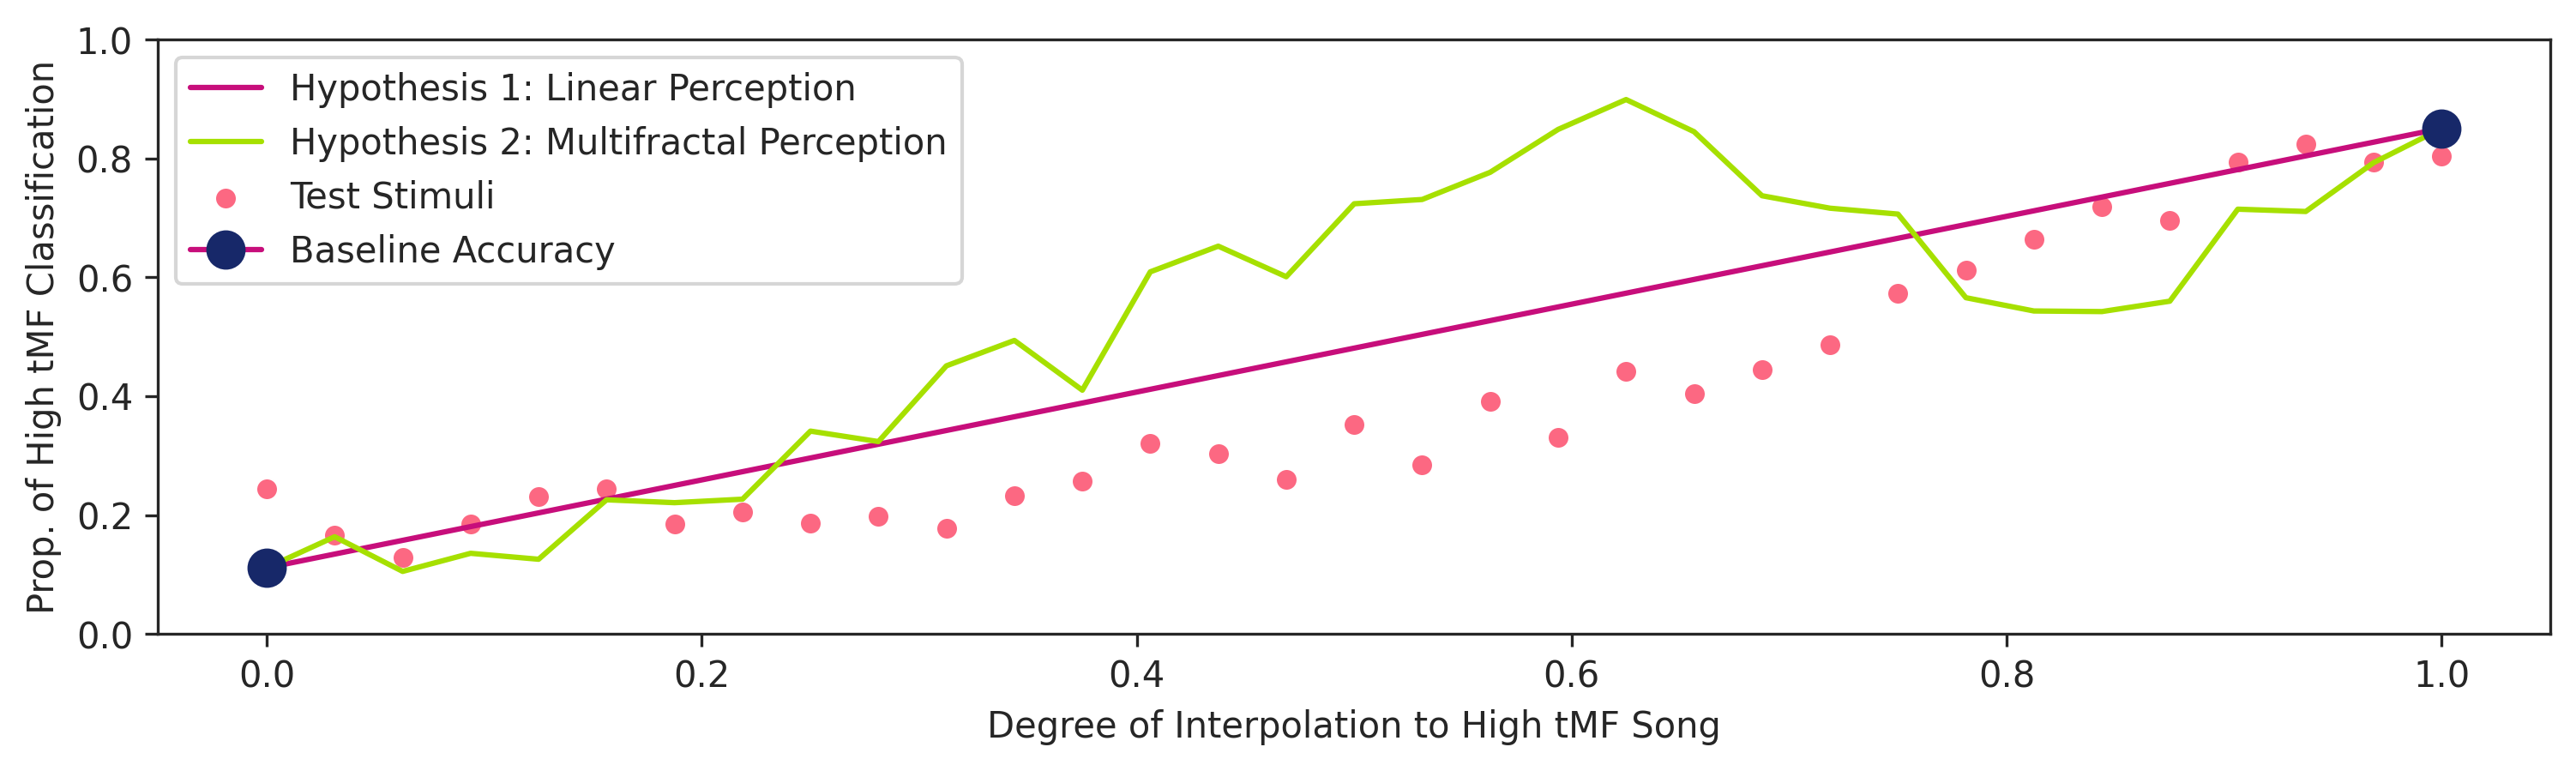

In [115]:
plt.figure(figsize = (12, 3), dpi = 300)

plt.plot(
    hypo1_linear_0[0],
    hypo1_linear_0[1],
    label = 'Hypothesis 1: Linear Perception'
)

plt.plot(
    hypo2_linear_0[0],
    hypo2_linear_0[1],
    label = 'Hypothesis 2: Multifractal Perception'
)

sns.scatterplot(
    data = PMFX_0_L,
    x = 'inter_degree',
    y = 'prop',
    label = 'Test Stimuli',
    color = '#FC6882'
)

plt.plot(1, left_baseline_0, marker = 'o', markerfacecolor = '#172869', markeredgecolor = '#172869', markersize = 10, label = 'Baseline Accuracy')
plt.plot(0, right_baseline_0, marker = 'o', markerfacecolor = '#172869', markeredgecolor = '#172869', markersize = 10)

plt.ylim(0, 1)

plt.legend()

plt.ylim(0, 1)
plt.ylabel('Prop. of High tMF Classification')
plt.xlabel('Degree of Interpolation to High tMF Song')

plt.savefig(FIGURE_DIR / 'F5_B_Index0.pdf', dpi = 'figure', format = 'pdf', transparent = True)

In [116]:
PMFX_0_L['linear_pred'] = np.flip(hypo1_linear_0[1])
PMFX_0_L['mf_pred'] = np.flip(hypo2_linear_0[1])

#### R2

In [117]:
r2_score(PMFX_0_L['prop'][1:-1], PMFX_0_L['linear_pred'][1:-1])

0.690504489794585

In [118]:
r2_score(PMFX_0_L['prop'][1:-1], PMFX_0_L['mf_pred'][1:-1])

-0.40437668238076996

#### CHI

In [119]:
CHI_count_0 = pd.DataFrame(test_data_0.groupby(
    ['inter_nums']
)['response'].agg(
    total = 'count'
)).reset_index()

CHI_count_0 = CHI_count_0.sort_values(by = 'inter_nums', ascending = False)

linear_exp_0 = (PMFX_0_L['linear_pred'].values * CHI_count_0['total']).values[1:-1]
linear_exp_0 = linear_exp_0 * (sum((PMFX_0_L['prop'].values[1:-1] * CHI_count_0['total'][1:-1]).astype(int))/ sum(linear_exp_0))

mf_exp_0 = (PMFX_0_L['mf_pred'].values * CHI_count_0['total']).values[1:-1]
mf_exp_0 = mf_exp_0 * (sum((PMFX_0_L['prop'].values[1:-1] * CHI_count_0['total'][1:-1]).astype(int))/ sum(mf_exp_0))

In [120]:
scipy.stats.chisquare(
    f_obs = (PMFX_0_L['prop'].values * CHI_count_0['total']).astype(int)[1:-1],
    f_exp = linear_exp_0
)

Power_divergenceResult(statistic=62.99626921188899, pvalue=0.0003934442669331228)

In [121]:
scipy.stats.chisquare(
    f_obs = (PMFX_0_L['prop'].values * CHI_count_0['total']).astype(int)[1:-1],
    f_exp = mf_exp_0
)

Power_divergenceResult(statistic=309.7207064013173, pvalue=3.19600931792835e-48)

In [122]:
sum(linear_exp_0)

1585.0000000000002

### pair 1

In [123]:
test_data_1 = test_data[test_data.pair_indices == '1']

In [124]:
PMFX_1 = pd.DataFrame(test_data_1.groupby(
    'inter_nums'
)['response'].agg('value_counts', normalize = True))
PMFX_1 = PMFX_1.rename(columns = {'response': 'prop'})
PMFX_1 = PMFX_1.reset_index()
PMFX_1_L = PMFX_1[PMFX_1.response == 'left']
PMFX_1_L['rank'] = PMFX_1_L['inter_nums'].rank(ascending = False)
PMFX_1_L = PMFX_1_L.sort_values(by = 'rank')
PMFX_1_L['inter_degree'] = np.linspace(0, 1, 33)

/tmp/ipykernel_41386/282608787.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PMFX_1_L['rank'] = PMFX_1_L['inter_nums'].rank(ascending = False)


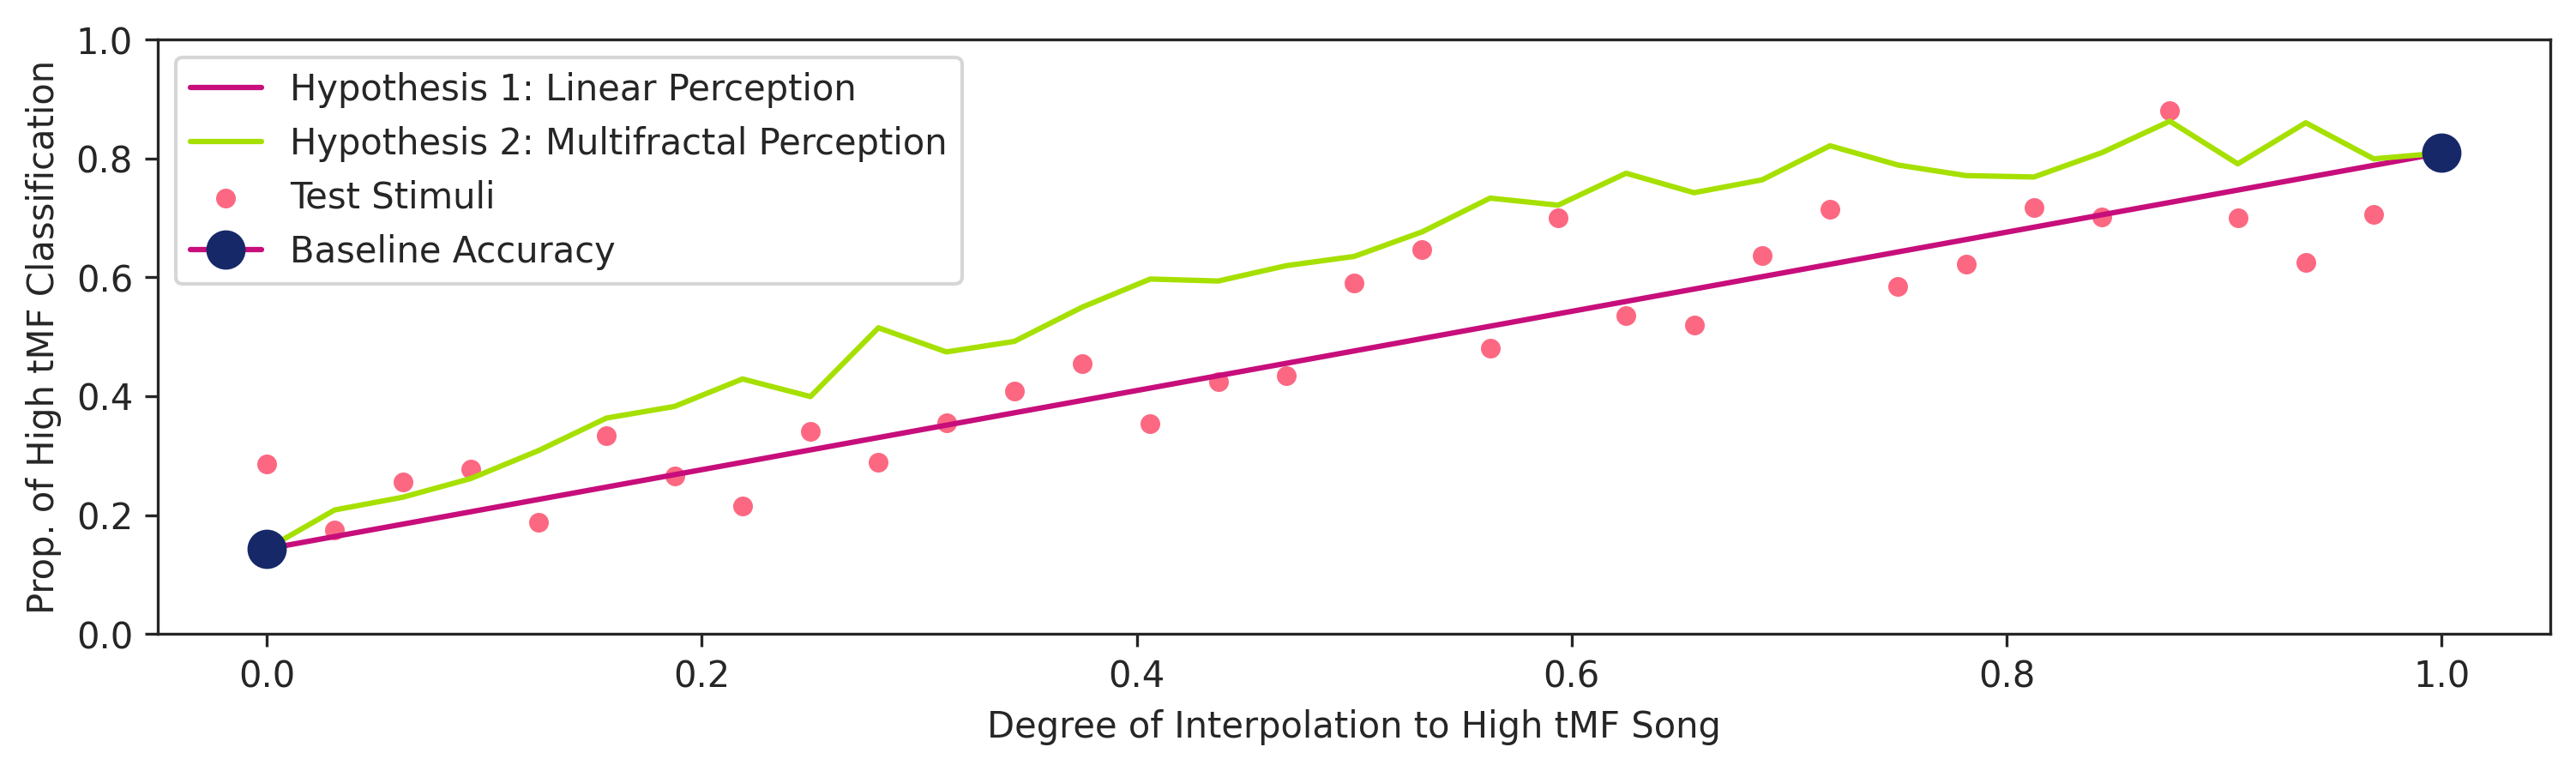

In [125]:
plt.figure(figsize = (12, 3), dpi = 300)

plt.plot(
    hypo1_linear_1[0],
    hypo1_linear_1[1],
    label = 'Hypothesis 1: Linear Perception'
)

plt.plot(
    hypo2_linear_1[0],
    hypo2_linear_1[1],
    label = 'Hypothesis 2: Multifractal Perception'
)

sns.scatterplot(
    data = PMFX_1_L,
    x = 'inter_degree',
    y = 'prop',
    label = 'Test Stimuli',
    color = '#FC6882'
)

plt.plot(1, left_baseline_1, marker = 'o', markerfacecolor = '#172869', markeredgecolor = '#172869', markersize = 10, label = 'Baseline Accuracy')
plt.plot(0, right_baseline_1, marker = 'o', markerfacecolor = '#172869', markeredgecolor = '#172869', markersize = 10)

plt.ylim(0, 1)

plt.legend()

plt.ylim(0, 1)
plt.ylabel('Prop. of High tMF Classification')
plt.xlabel('Degree of Interpolation to High tMF Song')

plt.savefig(FIGURE_DIR / 'F5_C_Index1.pdf', dpi = 'figure', format = 'pdf', transparent = True)

In [126]:
PMFX_1_L['linear_pred'] = np.flip(hypo1_linear_1[1])
PMFX_1_L['mf_pred'] = np.flip(hypo2_linear_1[1])

In [127]:
r2_score(PMFX_1_L['prop'][1:-1], PMFX_1_L['linear_pred'][1:-1])

0.8420394360349874

In [128]:
r2_score(PMFX_1_L['prop'][1:-1], PMFX_1_L['mf_pred'][1:-1])

0.41784382503973483

#### CHI

In [129]:
CHI_count_1 = pd.DataFrame(test_data_1.groupby(
    ['inter_nums']
)['response'].agg(
    total = 'count'
)).reset_index()

CHI_count_1 = CHI_count_1.sort_values(by = 'inter_nums', ascending = False)

linear_exp_1 = (PMFX_1_L['linear_pred'].values * CHI_count_1['total']).values[1:-1]
linear_exp_1 = linear_exp_1 * (sum((PMFX_1_L['prop'].values[1:-1] * CHI_count_1['total'][1:-1]).astype(int))/ sum(linear_exp_1))

mf_exp_1 = (PMFX_1_L['mf_pred'].values * CHI_count_1['total']).values[1:-1]
mf_exp_1 = mf_exp_1 * (sum((PMFX_1_L['prop'].values[1:-1] * CHI_count_1['total'][1:-1]).astype(int))/ sum(mf_exp_1))

In [130]:
scipy.stats.chisquare(
    f_obs = (PMFX_1_L['prop'].values * CHI_count_1['total']).astype(int)[1:-1],
    f_exp = linear_exp_1
)

Power_divergenceResult(statistic=17.664315885023377, pvalue=0.963719276519933)

In [131]:
scipy.stats.chisquare(
    f_obs = (PMFX_1_L['prop'].values * CHI_count_1['total']).astype(int)[1:-1],
    f_exp = mf_exp_1
)

Power_divergenceResult(statistic=21.169841763474206, pvalue=0.8825019679393448)

In [132]:
sum(mf_exp_1)

782.0